In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data using Pandas
df = pd.read_csv('stgs3_4_data.txt', sep='\t', skiprows=46)  # Adjust the number of rows to skip based on the file header
df = df.dropna()  # Drop rows with any NaN values
df['Time'] = pd.to_datetime(df['Time'])  # Convert 'Time' column to datetime

In [3]:
df['Stage3_Stepper'] = df['L1-PL1-MTR29:RawPos Value'].str.replace(',', '').astype(float)
df['Stage4_Stepper'] = df['L1-PL2-MTR09:RawPos Value'].str.replace(',', '').astype(float)

df.drop(columns=['L1-PL1-MTR29:RawPos Value', 'L1-PL2-MTR09:RawPos Value'], inplace=True)

# Rename columns for easier access (including the new split columns)
df.columns = ['Time', 'Stage3_OutputPower', 'Stage3_Piezo', 'Stage4_OutputPower', 'Stage4_Piezo', 
              'Stage3_Stepper', 'Stage4_Stepper']



In [4]:
df.head()

,Time,Stage3_OutputPower,Stage3_Piezo,Stage4_OutputPower,Stage4_Piezo,Stage3_Stepper,Stage4_Stepper
5,2024-06-14 18:46:29.766817093,0.017161,0.0,0.083602,0.0,-176387.0,-289957.0
6,2024-06-17 08:58:45.360144138,0.017161,0.0,0.153892,0.0,-176387.0,-289957.0
7,2024-06-17 08:58:45.609766960,0.072318,0.0,0.153892,0.0,-176387.0,-289957.0
8,2024-06-17 08:58:46.115516186,0.072318,0.0,0.223622,0.0,-176387.0,-289957.0
9,2024-06-17 08:58:46.396927834,0.072318,0.0,0.089850,0.0,-176387.0,-289957.0


/tmp/ipykernel_86539/3205825680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


                    Stage3_OutputPower  Stage3_Piezo  Stage4_OutputPower  \
Stage3_OutputPower            1.000000     -0.397885            0.908673   
Stage3_Piezo                 -0.397885      1.000000           -0.337627   
Stage4_OutputPower            0.908673     -0.337627            1.000000   
Stage4_Piezo                 -0.582990      0.239602           -0.690503   
Stage3_Stepper               -0.693511      0.282318           -0.629861   
Stage4_Stepper                0.317590      0.010521            0.587991   

                    Stage4_Piezo  Stage3_Stepper  Stage4_Stepper  
Stage3_OutputPower     -0.582990       -0.693511        0.317590  
Stage3_Piezo            0.239602        0.282318        0.010521  
Stage4_OutputPower     -0.690503       -0.629861        0.587991  
Stage4_Piezo            1.000000        0.411994       -0.470763  
Stage3_Stepper          0.411994        1.000000       -0.209777  
Stage4_Stepper         -0.470763       -0.209777        1.000000 

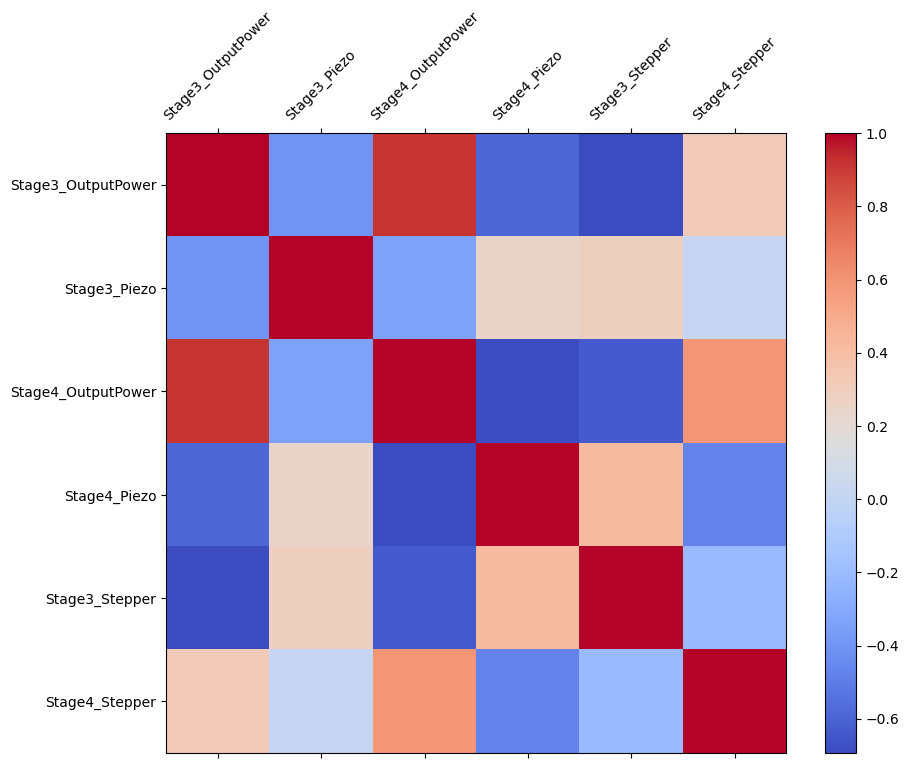

In [5]:
# Calculate correlations
correlations = df.corr()

# Display the correlation matrix
print(correlations)

# Plotting the correlations for visualization
plt.figure(figsize=(10, 8))
plt.matshow(correlations, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=45)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.colorbar()
plt.show()


Filtered correlation matrix (|correlation| > 0.5):
                    Stage3_OutputPower  Stage3_Piezo  Stage4_OutputPower  \
Stage3_OutputPower            1.000000           0.0            0.908673   
Stage3_Piezo                  0.000000           1.0            0.000000   
Stage4_OutputPower            0.908673           0.0            1.000000   
Stage4_Piezo                 -0.582990           0.0           -0.690503   
Stage3_Stepper               -0.693511           0.0           -0.629861   
Stage4_Stepper                0.000000           0.0            0.587991   

                    Stage4_Piezo  Stage3_Stepper  Stage4_Stepper  
Stage3_OutputPower     -0.582990       -0.693511        0.000000  
Stage3_Piezo            0.000000        0.000000        0.000000  
Stage4_OutputPower     -0.690503       -0.629861        0.587991  
Stage4_Piezo            1.000000        0.000000        0.000000  
Stage3_Stepper          0.000000        1.000000        0.000000  
Stage4_Steppe

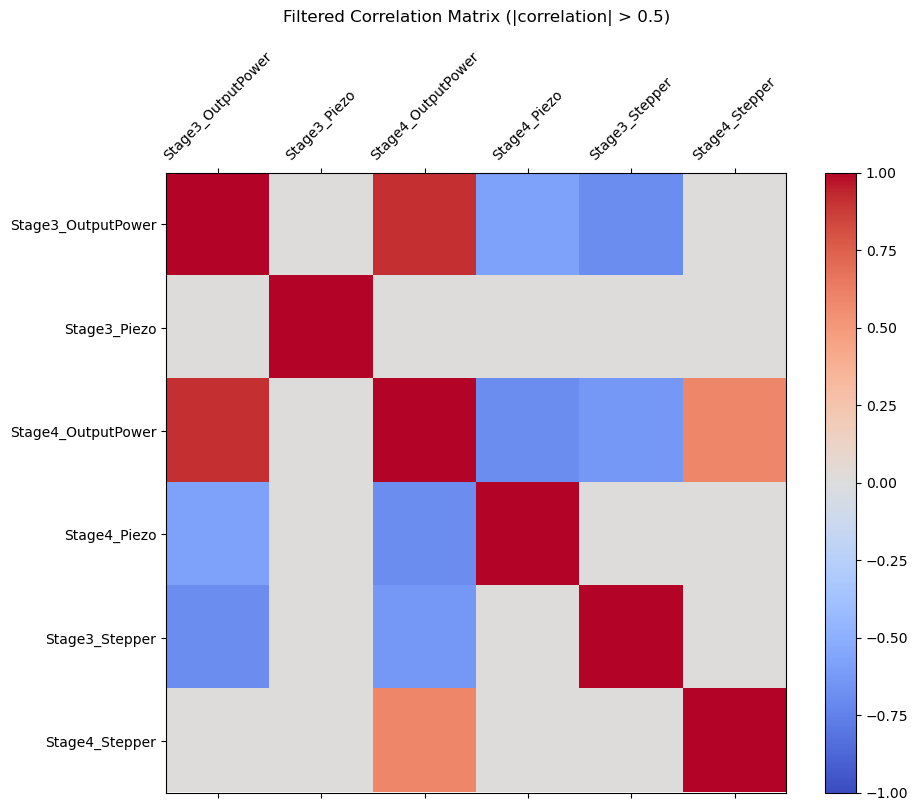

In [6]:
# Filter correlations to show only those with an absolute value greater than 0.5
filtered_correlations = correlations[(correlations > 0.5) | (correlations < -0.5)].fillna(0)

# Display the filtered correlation matrix
print("\nFiltered correlation matrix (|correlation| > 0.5):")
print(filtered_correlations)

# Plotting the filtered correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(filtered_correlations, fignum=1, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(filtered_correlations.columns)), filtered_correlations.columns, rotation=45)
plt.yticks(range(len(filtered_correlations.columns)), filtered_correlations.columns)
plt.colorbar()
plt.title("Filtered Correlation Matrix (|correlation| > 0.5)", pad=20)
plt.show()

Partial correlation matrix:
                   Stage3_OutputPower Stage3_Piezo Stage3_Stepper  \
Stage3_OutputPower                NaN     -0.07535       -0.28169   
Stage3_Piezo                 -0.07535          NaN        0.00516   
Stage3_Stepper               -0.28169      0.00516            NaN   
Stage4_OutputPower           0.869537    -0.067348      -0.009844   
Stage4_Piezo                 0.103678     0.049577       0.015676   
Stage4_Stepper              -0.580429      0.16968       0.021367   

                   Stage4_OutputPower Stage4_Piezo Stage4_Stepper  
Stage3_OutputPower           0.869537     0.103678      -0.580429  
Stage3_Piezo                -0.067348     0.049577        0.16968  
Stage3_Stepper              -0.009844     0.015676       0.021367  
Stage4_OutputPower                NaN    -0.313834       0.709476  
Stage4_Piezo                -0.313834          NaN      -0.029808  
Stage4_Stepper               0.709476    -0.029808            NaN  


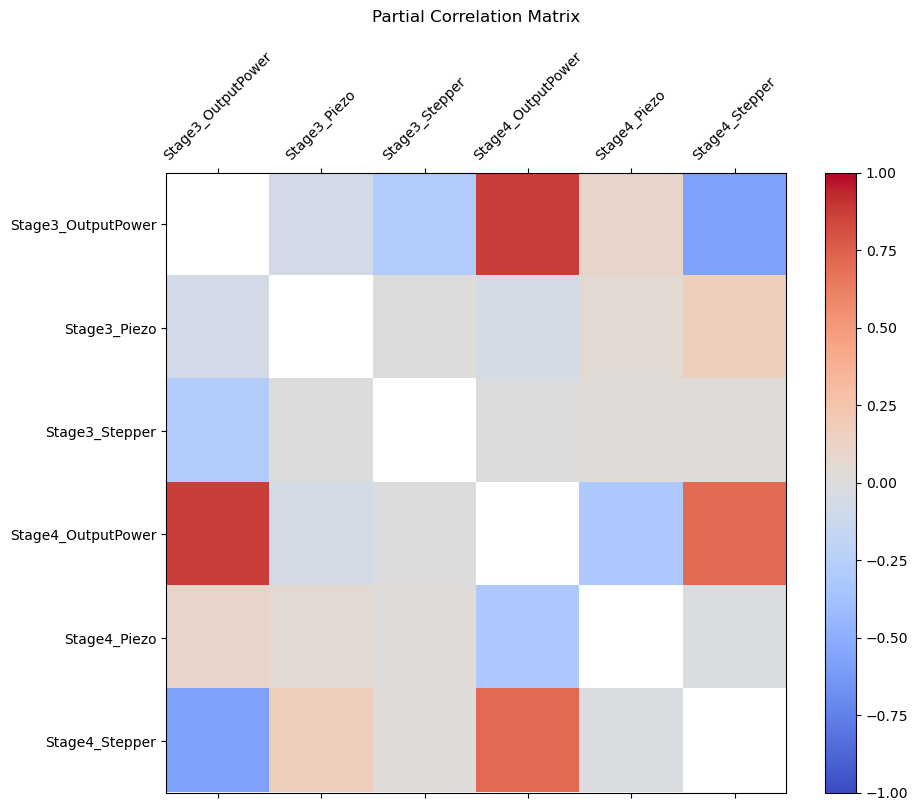

In [7]:
import itertools
import pingouin as pg

columns = ['Stage3_OutputPower', 'Stage3_Piezo', 'Stage3_Stepper', 
           'Stage4_OutputPower', 'Stage4_Piezo', 'Stage4_Stepper']

partial_corr_results = pd.DataFrame(index=columns, columns=columns)

# Calculate partial correlations for all pairs
for x, y in itertools.combinations(columns, 2):
    covar = list(set(columns) - {x, y})  # All other variables as covariates
    result = pg.partial_corr(data=df, x=x, y=y, covar=covar)
    partial_corr_results.at[x, y] = result['r'].values[0]
    partial_corr_results.at[y, x] = result['r'].values[0]  # Correlation matrix is symmetric

# Display the partial correlation matrix
print("Partial correlation matrix:")
print(partial_corr_results)

# Visualize the matrix
plt.figure(figsize=(10, 8))
plt.matshow(partial_corr_results.astype(float), fignum=1, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(partial_corr_results.columns)), partial_corr_results.columns, rotation=45)
plt.yticks(range(len(partial_corr_results.columns)), partial_corr_results.columns)
plt.colorbar()
plt.title("Partial Correlation Matrix", pad=20)
plt.show()

In [8]:
print(df.columns)

Index(['Time', 'Stage3_OutputPower', 'Stage3_Piezo', 'Stage4_OutputPower',
       'Stage4_Piezo', 'Stage3_Stepper', 'Stage4_Stepper'],
      dtype='object')


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
"""

file_path = 'stg4spec.txt'
output_file_path = 'processed_stg4spec.csv'
chunksize = 1000  # Adjust based on available memory

# Create or overwrite the output file
with open(output_file_path, 'w') as f:
    f.write('Time,Intensities,Wavelengths\n')  # Write header

# Process and save in chunks
for chunk in tqdm(pd.read_csv(file_path, sep='\t', skiprows=22, chunksize=chunksize)):
    # Replace "Archive_Disabled" with NaN and drop those rows
    chunk.replace("Archive_Disabled", np.nan, inplace=True)
    chunk.dropna(inplace=True)
    
    # Split the columns for wavelengths and intensities
    chunk['Intensities'] = chunk['L1-SPEC-DIAG1-CH5:Intensities Value'].str.split(', ')
    chunk['Wavelengths'] = chunk['L1-SPEC-DIAG1-CH5:Wavelengths Value'].str.split(', ')
    
    # Convert lists of strings to lists of floats
    chunk['Intensities'] = chunk['Intensities'].apply(lambda x: [float(i.replace(',', '')) for i in x])
    chunk['Wavelengths'] = chunk['Wavelengths'].apply(lambda x: [float(w.replace(',', '')) for w in x])
    
    # Drop the original columns
    chunk.drop(columns=['L1-SPEC-DIAG1-CH5:Intensities Value', 'L1-SPEC-DIAG1-CH5:Wavelengths Value'], inplace=True)
    
    # Append the processed chunk to the CSV file
    chunk.to_csv(output_file_path, mode='a', index=False, header=False)
    del(chunk)
    
"""

'\n\nfile_path = \'stg4spec.txt\'\noutput_file_path = \'processed_stg4spec.csv\'\nchunksize = 1000  # Adjust based on available memory\n\n# Create or overwrite the output file\nwith open(output_file_path, \'w\') as f:\n    f.write(\'Time,Intensities,Wavelengths\n\')  # Write header\n\n# Process and save in chunks\nfor chunk in tqdm(pd.read_csv(file_path, sep=\'\t\', skiprows=22, chunksize=chunksize)):\n    # Replace "Archive_Disabled" with NaN and drop those rows\n    chunk.replace("Archive_Disabled", np.nan, inplace=True)\n    chunk.dropna(inplace=True)\n    \n    # Split the columns for wavelengths and intensities\n    chunk[\'Intensities\'] = chunk[\'L1-SPEC-DIAG1-CH5:Intensities Value\'].str.split(\', \')\n    chunk[\'Wavelengths\'] = chunk[\'L1-SPEC-DIAG1-CH5:Wavelengths Value\'].str.split(\', \')\n    \n    # Convert lists of strings to lists of floats\n    chunk[\'Intensities\'] = chunk[\'Intensities\'].apply(lambda x: [float(i.replace(\',\', \'\')) for i in x])\n    chunk[\'Wav

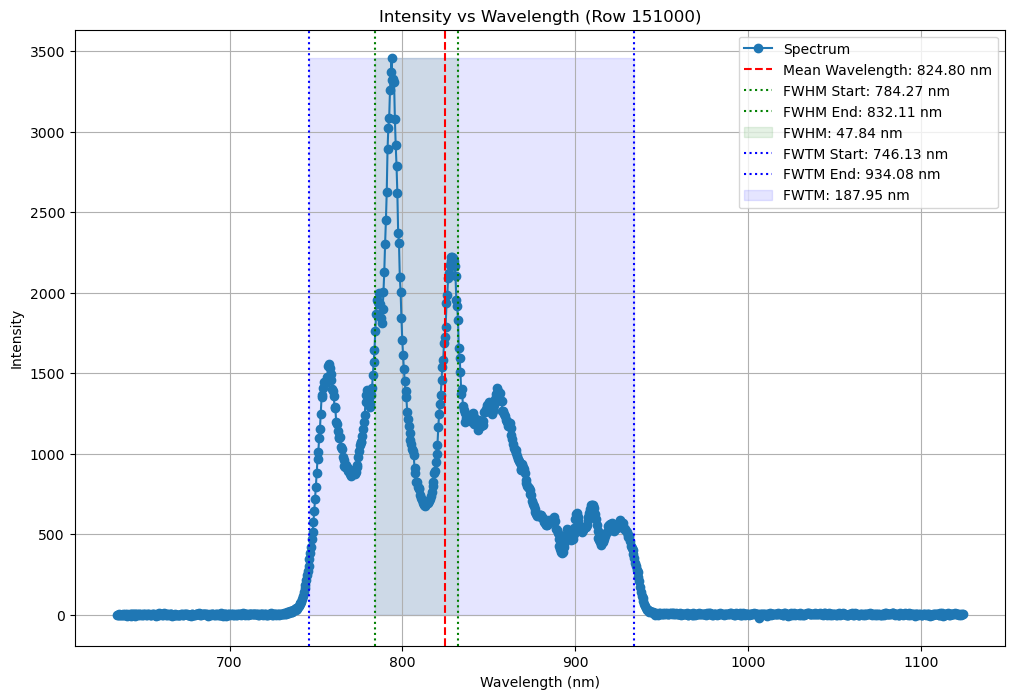

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

output_file_path = 'processed_stg3spec.csv'

def plot_row(file_path, row_to_plot):
    with pd.read_csv(file_path, chunksize=1, skiprows=row_to_plot + 1) as reader:
        for chunk in reader:
            intensities = eval(chunk.iloc[0, 1])  # Second column in the processed CSV
            wavelengths = eval(chunk.iloc[0, 2])  # Third column in the processed CSV

            # Convert to numpy arrays for calculation
            wavelengths = np.array(wavelengths)
            intensities = np.array(intensities)

            # Calculate Mean Wavelength (Center of Mass)
            mean_wavelength = np.sum(wavelengths * intensities) / np.sum(intensities)

            # Calculate Standard Deviation (Width)
            std_deviation = np.sqrt(np.sum(intensities * (wavelengths - mean_wavelength) ** 2) / np.sum(intensities))

            # Calculate FWHM
            half_max = max(intensities) / 2
            indices_above_half_max = np.where(intensities >= half_max)[0]
            fwhm_start = wavelengths[indices_above_half_max[0]]
            fwhm_end = wavelengths[indices_above_half_max[-1]]
            fwhm = fwhm_end - fwhm_start

            # Calculate FWTM
            tenth_max = max(intensities) / 10
            indices_above_tenth_max = np.where(intensities >= tenth_max)[0]
            fwtm_start = wavelengths[indices_above_tenth_max[0]]
            fwtm_end = wavelengths[indices_above_tenth_max[-1]]
            fwtm = fwtm_end - fwtm_start

            # Plotting the data
            plt.figure(figsize=(12, 8))
            plt.plot(wavelengths, intensities, marker='o', label='Spectrum')

            # Highlight Mean Wavelength
            plt.axvline(mean_wavelength, color='red', linestyle='--', label=f'Mean Wavelength: {mean_wavelength:.2f} nm')

            # Highlight FWHM
            plt.axvline(fwhm_start, color='green', linestyle=':', label=f'FWHM Start: {fwhm_start:.2f} nm')
            plt.axvline(fwhm_end, color='green', linestyle=':', label=f'FWHM End: {fwhm_end:.2f} nm')
            plt.fill_betweenx([0, max(intensities)], fwhm_start, fwhm_end, color='green', alpha=0.1, label=f'FWHM: {fwhm:.2f} nm')

            # Highlight FWTM
            plt.axvline(fwtm_start, color='blue', linestyle=':', label=f'FWTM Start: {fwtm_start:.2f} nm')
            plt.axvline(fwtm_end, color='blue', linestyle=':', label=f'FWTM End: {fwtm_end:.2f} nm')
            plt.fill_betweenx([0, max(intensities)], fwtm_start, fwtm_end, color='blue', alpha=0.1, label=f'FWTM: {fwtm:.2f} nm')

            # Annotating the plot with calculations
            # plt.text(0.05, 0.95, f'Mean Wavelength: {mean_wavelength:.2f} nm',
            #          ha='left', va='top', transform=plt.gca().transAxes, fontsize=10)
            # plt.text(0.05, 0.90, f'Std Dev: {std_deviation:.2f} nm',
            #          ha='left', va='top', transform=plt.gca().transAxes, fontsize=10)
            # plt.text(0.05, 0.85, f'FWHM: {fwhm:.2f} nm',
            #          ha='left', va='top', transform=plt.gca().transAxes, fontsize=10)
            # plt.text(0.05, 0.80, f'FWTM: {fwtm:.2f} nm',
            #          ha='left', va='top', transform=plt.gca().transAxes, fontsize=10)

            plt.title(f'Intensity vs Wavelength (Row {row_to_plot})')
            plt.xlabel('Wavelength (nm)')
            plt.ylabel('Intensity')
            plt.legend()
            plt.grid(True)

            plt.show()
            break

# Example usage: Plotting the 150,000th row
plot_row(output_file_path, 151000)

In [11]:
import pandas as pd

# Create index for Stage 3 and Stage 4 spectral data
# This step can be done separately to create indexed files for future use.

def create_indexed_csv(input_file, output_file):
    df = pd.read_csv(input_file, usecols=['Time'], parse_dates=['Time'])
    df.set_index('Time', inplace=True)
    df.to_csv(output_file, index=True)

"""
# Example usage
create_indexed_csv('processed_stg3spec.csv', 'indexed_stg3spec.csv')
create_indexed_csv('processed_stg4spec.csv', 'indexed_stg4spec.csv')
"""

"\n# Example usage\ncreate_indexed_csv('processed_stg3spec.csv', 'indexed_stg3spec.csv')\ncreate_indexed_csv('processed_stg4spec.csv', 'indexed_stg4spec.csv')\n"

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_spectral_data_for_time(file_path, closest_idx):
    # Read the specific row from the CSV file corresponding to closest_idx
    row = pd.read_csv(file_path, skiprows=closest_idx + 1, nrows=1).iloc[0]
    # Use .iloc to access the values by position
    intensities = eval(row.iloc[1])  # Assuming the intensities are in the second column
    wavelengths = eval(row.iloc[2])  # Assuming the wavelengths are in the third column
    
    return calculate_spectral_metrics(wavelengths, intensities)

def calculate_spectral_metrics(wavelengths, intensities):
    # Convert to numpy arrays for calculation
    wavelengths = np.array(wavelengths)
    # print(intensities)
    intensities = np.array(intensities)

    # Calculate Mean Wavelength (Center of Mass)
    mean_wavelength = np.sum(wavelengths * intensities) / np.sum(intensities)

    tenth_max = max(intensities) / 10
    indices_above_tenth_max = np.where(intensities >= tenth_max)[0]
    fwtm_start = wavelengths[indices_above_tenth_max[0]]
    fwtm_end = wavelengths[indices_above_tenth_max[-1]]
    fwtm = fwtm_end - fwtm_start

    return mean_wavelength, fwtm

# Function to find the closest timestamp index
def find_closest_timestamp(reference_time, spectra_times):
    return spectra_times.index.get_indexer([reference_time], method='nearest')[0]

# # Function to calculate Mean Wavelength and FWHM
# def calculate_spectral_metrics(wavelengths, intensities):
#     wavelengths = np.array(wavelengths)
#     intensities = np.array(intensities)
#     mean_wavelength = np.sum(wavelengths * intensities) / np.sum(intensities)
#     half_max = max(intensities) / 2
#     indices_above_half_max = np.where(intensities >= half_max)[0]
#     fwhm = wavelengths[indices_above_half_max[-1]] - wavelengths[indices_above_half_max[0]]
#     return mean_wavelength, fwhm

In [13]:
import pandas as pd
import numpy as np

"""
# Process the data in chunks to save memory
chunksize = 1000  # Adjust based on your memory capacity
output_file = 'processed_stage_data.csv'

# Create an indexed DataFrame for fast timestamp lookup
stg3_spectra_df = pd.read_csv('indexed_stg3spec.csv', parse_dates=['Time'], index_col='Time')
stg4_spectra_df = pd.read_csv('indexed_stg4spec.csv', parse_dates=['Time'], index_col='Time')

# Read the main DataFrame in chunks
for chunk in pd.read_csv('stgs3_4_data.txt', sep='\t', skiprows=46, chunksize=chunksize, parse_dates=['Time']):
    chunk = chunk.dropna()

    
    # Convert 'L1-PL1-MTR29:RawPos Value' and 'L1-PL2-MTR09:RawPos Value' columns to float
    chunk['Stage3_Stepper'] = chunk['L1-PL1-MTR29:RawPos Value'].str.replace(',', '').astype(float)
    chunk['Stage4_Stepper'] = chunk['L1-PL2-MTR09:RawPos Value'].str.replace(',', '').astype(float)
    chunk.drop(columns=['L1-PL1-MTR29:RawPos Value', 'L1-PL2-MTR09:RawPos Value'], inplace=True)
    
    chunk.columns = ['Time', 'Stage3_OutputPower', 'Stage3_Piezo', 'Stage4_OutputPower', 'Stage4_Piezo', 
              'Stage3_Stepper', 'Stage4_Stepper']
    # Initialize columns for the new data
    chunk['Mean_Wavelength_Stage3'] = np.nan
    chunk['FWTM_Stage3'] = np.nan
    chunk['Mean_Wavelength_Stage4'] = np.nan
    chunk['FWTM_Stage4'] = np.nan

    # Iterate through each row in the chunk
    for i, line in chunk.iterrows():
        # Find the closest timestamps in the indexed spectral data
        try:
            closest_idx_stage3 = find_closest_timestamp(line['Time'], stg3_spectra_df)
            closest_idx_stage4 = find_closest_timestamp(line['Time'], stg4_spectra_df)

            # Read the corresponding spectra data from the full CSV
            mean_wavelength_stage3, fwtm_stage3 = get_spectral_data_for_time('processed_stg3spec.csv', closest_idx_stage3)
            mean_wavelength_stage4, fwtm_stage4 = get_spectral_data_for_time('processed_stg4spec.csv', closest_idx_stage4)

            # Store the results in the chunk
            chunk.at[i, 'Mean_Wavelength_Stage3'] = mean_wavelength_stage3
            chunk.at[i, 'FWTM_Stage3'] = fwtm_stage3
            chunk.at[i, 'Mean_Wavelength_Stage4'] = mean_wavelength_stage4
            chunk.at[i, 'FWTM_Stage4'] = fwtm_stage4

        except KeyError:
            # Handle cases where the timestamp might not exist
            print("timestamp non-existent")
            continue

    # Append the processed chunk to the output file
    chunk.to_csv(output_file, mode='a', index=False)
    
"""

'\n# Process the data in chunks to save memory\nchunksize = 1000  # Adjust based on your memory capacity\noutput_file = \'processed_stage_data.csv\'\n\n# Create an indexed DataFrame for fast timestamp lookup\nstg3_spectra_df = pd.read_csv(\'indexed_stg3spec.csv\', parse_dates=[\'Time\'], index_col=\'Time\')\nstg4_spectra_df = pd.read_csv(\'indexed_stg4spec.csv\', parse_dates=[\'Time\'], index_col=\'Time\')\n\n# Read the main DataFrame in chunks\nfor chunk in pd.read_csv(\'stgs3_4_data.txt\', sep=\'\t\', skiprows=46, chunksize=chunksize, parse_dates=[\'Time\']):\n    chunk = chunk.dropna()\n\n    \n    # Convert \'L1-PL1-MTR29:RawPos Value\' and \'L1-PL2-MTR09:RawPos Value\' columns to float\n    chunk[\'Stage3_Stepper\'] = chunk[\'L1-PL1-MTR29:RawPos Value\'].str.replace(\',\', \'\').astype(float)\n    chunk[\'Stage4_Stepper\'] = chunk[\'L1-PL2-MTR09:RawPos Value\'].str.replace(\',\', \'\').astype(float)\n    chunk.drop(columns=[\'L1-PL1-MTR29:RawPos Value\', \'L1-PL2-MTR09:RawPos Valu

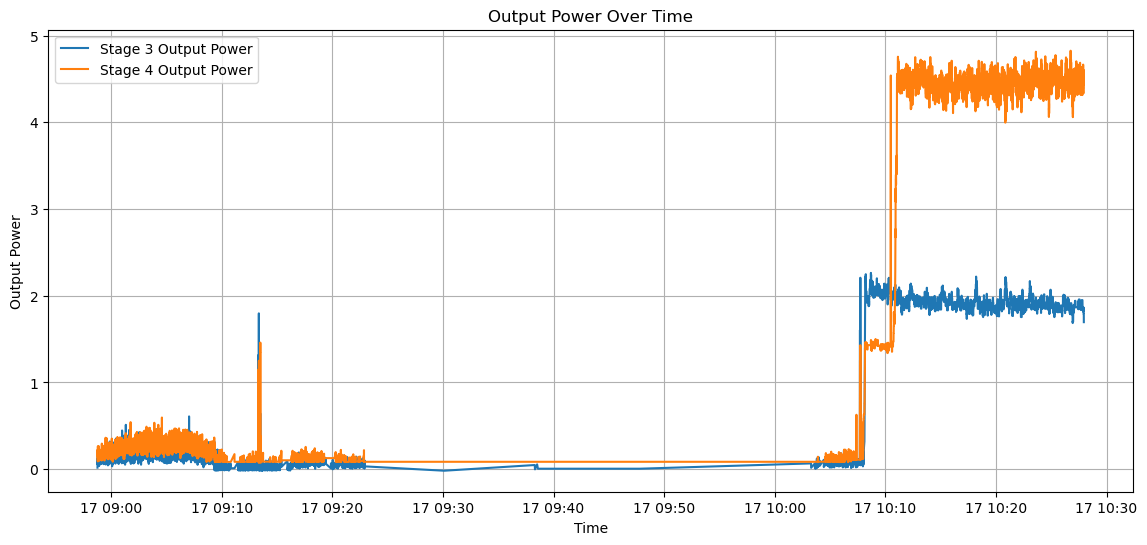

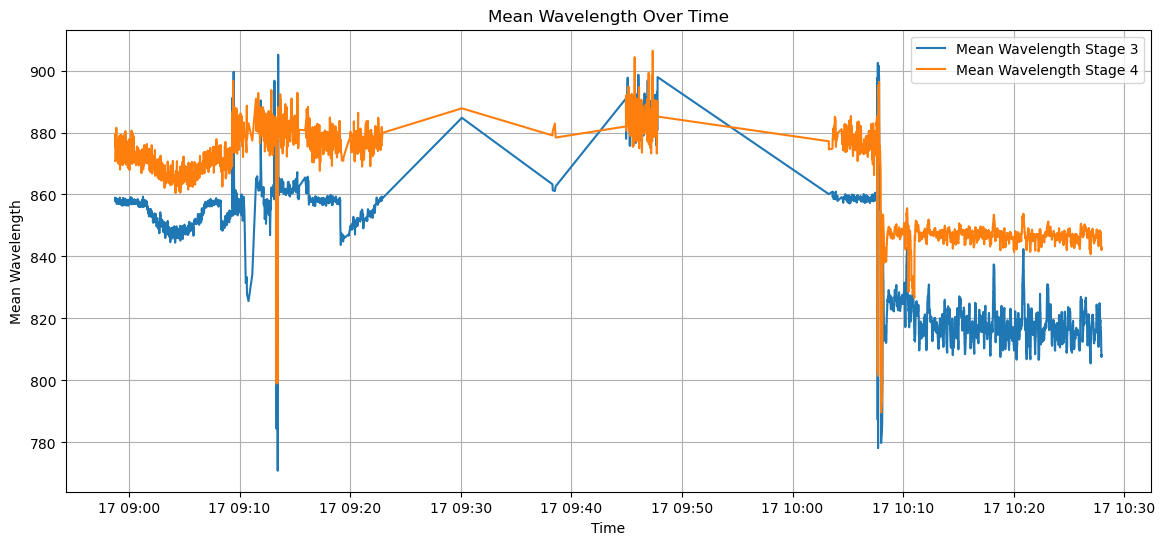

/tmp/ipykernel_86539/3516035736.py:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


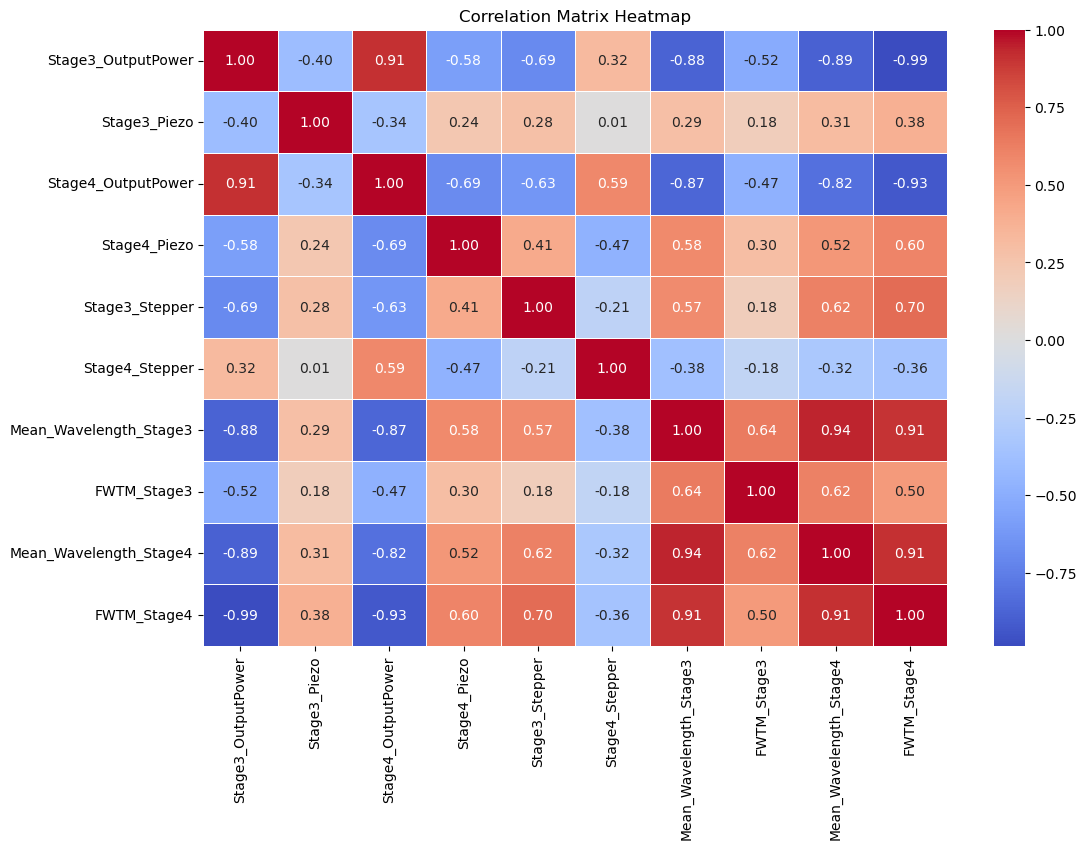

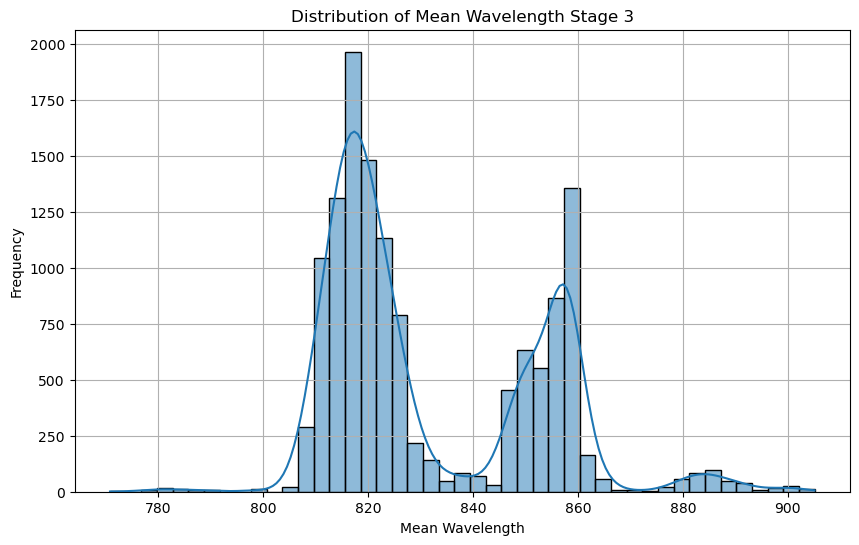

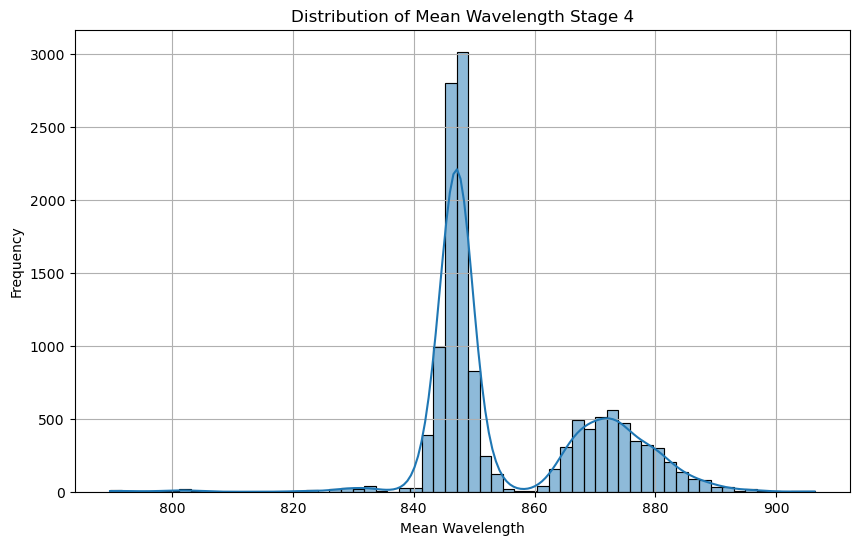

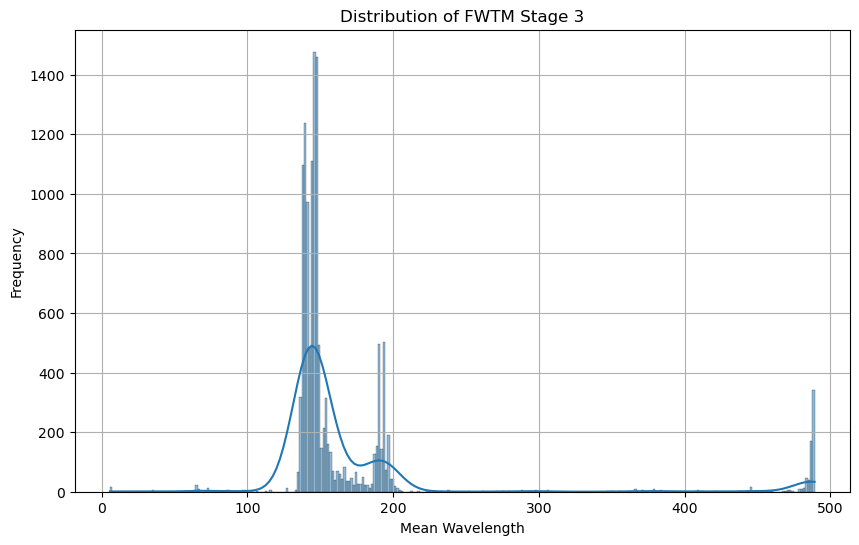

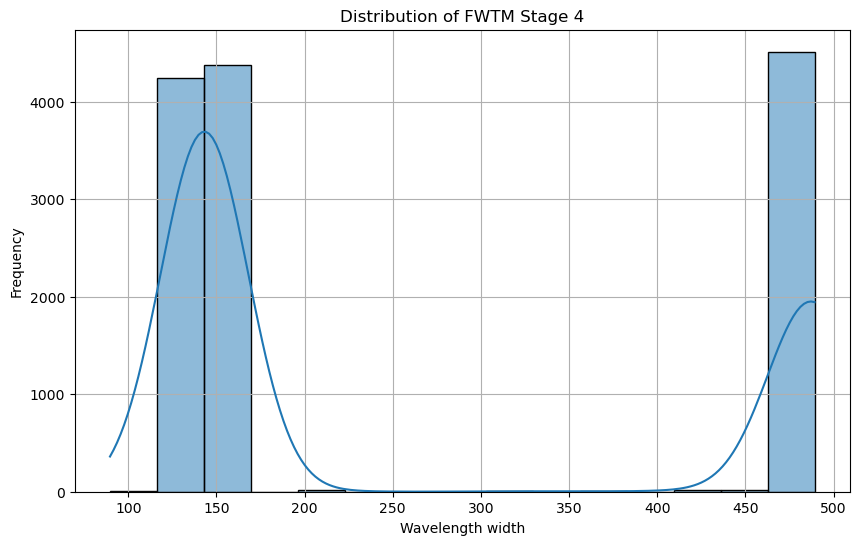

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Time' column to datetime
file_path = 'processed_stage_data.csv'
data = pd.read_csv(file_path)

data['Time'] = pd.to_datetime(data['Time'])

# 1. Time-Series Plots

# Plot for Stage 3 and Stage 4 Output Power over time
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Stage3_OutputPower'], label='Stage 3 Output Power')
plt.plot(data['Time'], data['Stage4_OutputPower'], label='Stage 4 Output Power')
plt.title('Output Power Over Time')
plt.xlabel('Time')
plt.ylabel('Output Power')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Mean Wavelength over time
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Mean_Wavelength_Stage3'], label='Mean Wavelength Stage 3')
plt.plot(data['Time'], data['Mean_Wavelength_Stage4'], label='Mean Wavelength Stage 4')
plt.title('Mean Wavelength Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Wavelength')
plt.legend()
plt.grid(True)
plt.show()

# 4. Heatmap of Correlations

# Compute correlations
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. Distribution Plots for Mean Wavelength

# Plot distribution for Stage 3
plt.figure(figsize=(10, 6))
sns.histplot(data['Mean_Wavelength_Stage3'], kde=True)
plt.title('Distribution of Mean Wavelength Stage 3')
plt.xlabel('Mean Wavelength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot distribution for Stage 4
plt.figure(figsize=(10, 6))
sns.histplot(data['Mean_Wavelength_Stage4'], kde=True)
plt.title('Distribution of Mean Wavelength Stage 4')
plt.xlabel('Mean Wavelength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot distribution of FWTM

# Plot distribution for Stage 3
plt.figure(figsize=(10, 6))
sns.histplot(data['FWTM_Stage3'], kde=True)
plt.title('Distribution of FWTM Stage 3')
plt.xlabel('Mean Wavelength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot distribution for Stage 4
plt.figure(figsize=(10, 6))
sns.histplot(data['FWTM_Stage4'], kde=True)
plt.title('Distribution of FWTM Stage 4')
plt.xlabel('Wavelength width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data inspection

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 5 to 13204
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Time                13200 non-null  datetime64[ns]
 1   Stage3_OutputPower  13200 non-null  float64       
 2   Stage3_Piezo        13200 non-null  float64       
 3   Stage4_OutputPower  13200 non-null  float64       
 4   Stage4_Piezo        13200 non-null  float64       
 5   Stage3_Stepper      13200 non-null  float64       
 6   Stage4_Stepper      13200 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 825.0 KB


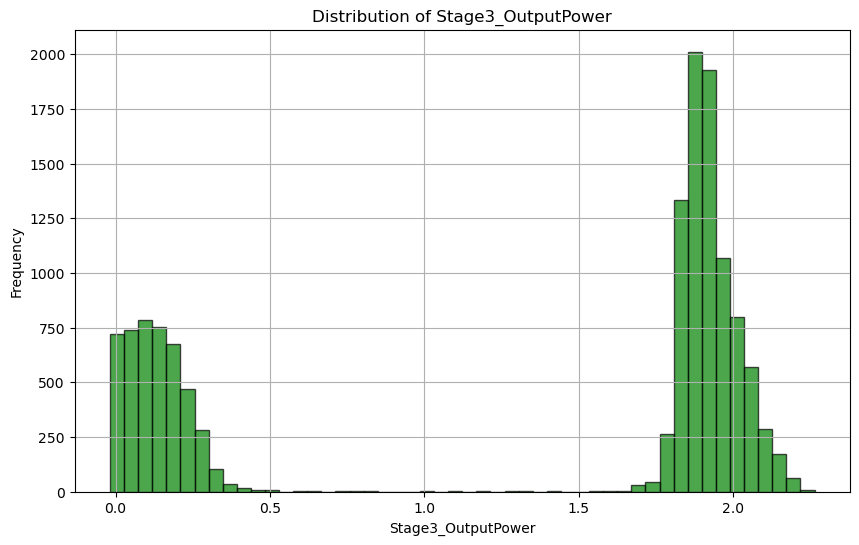

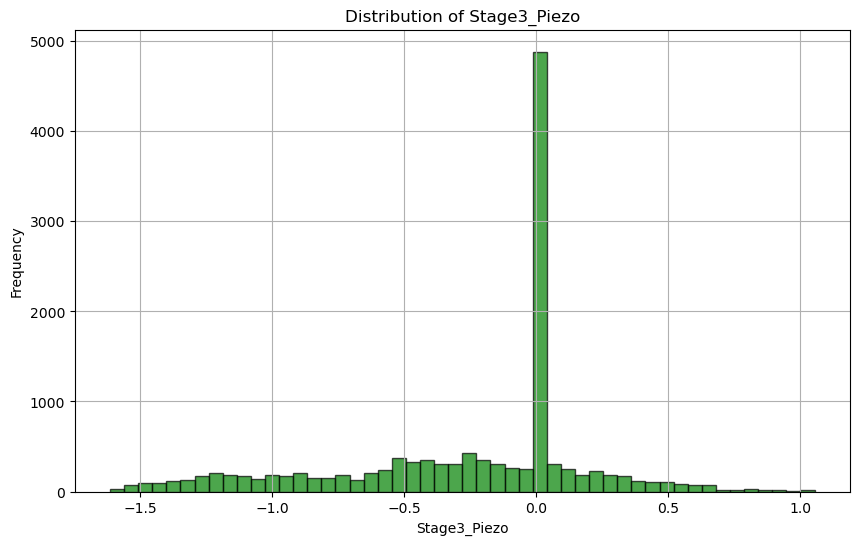

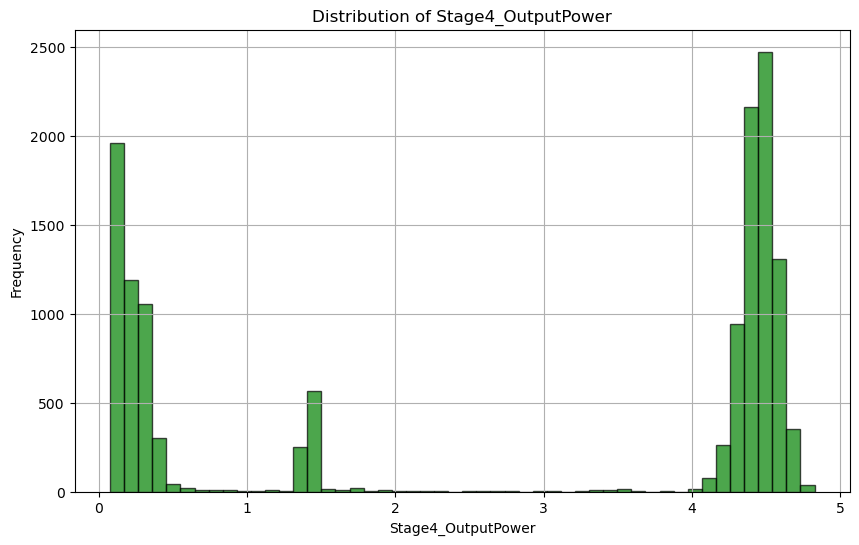

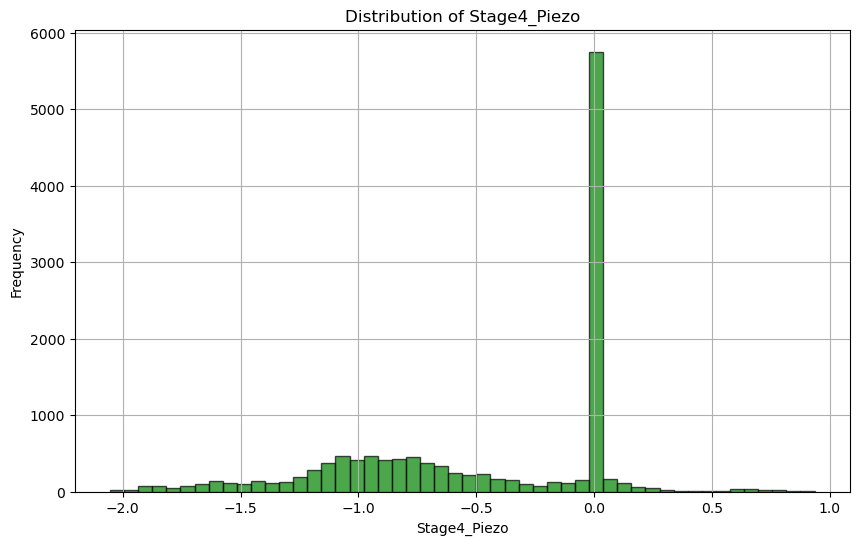

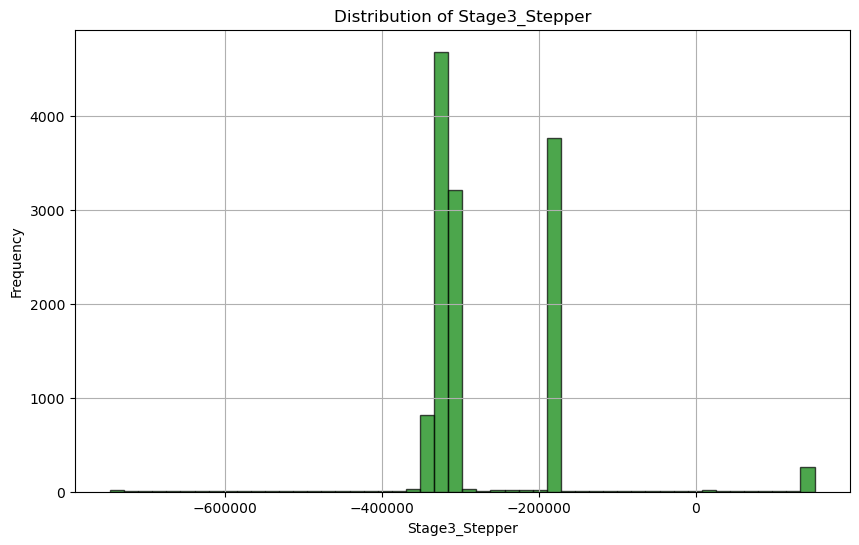

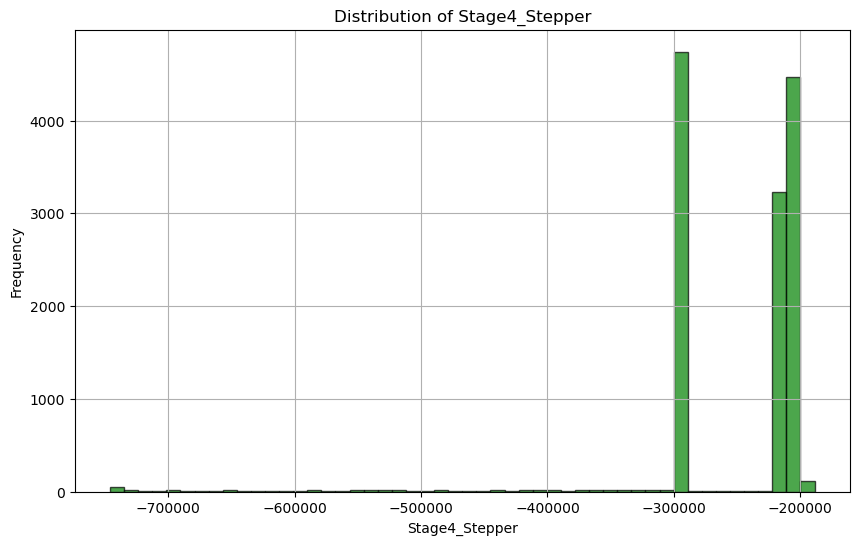

In [16]:
# List of features to plot
features = ['Stage3_OutputPower', 
            'Stage3_Piezo', 
            'Stage4_OutputPower', 
            'Stage4_Piezo', 
            'Stage3_Stepper', 
            'Stage4_Stepper']

# Plot distribution of unique values for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    df[feature].plot(kind='hist', bins=50, color='green', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

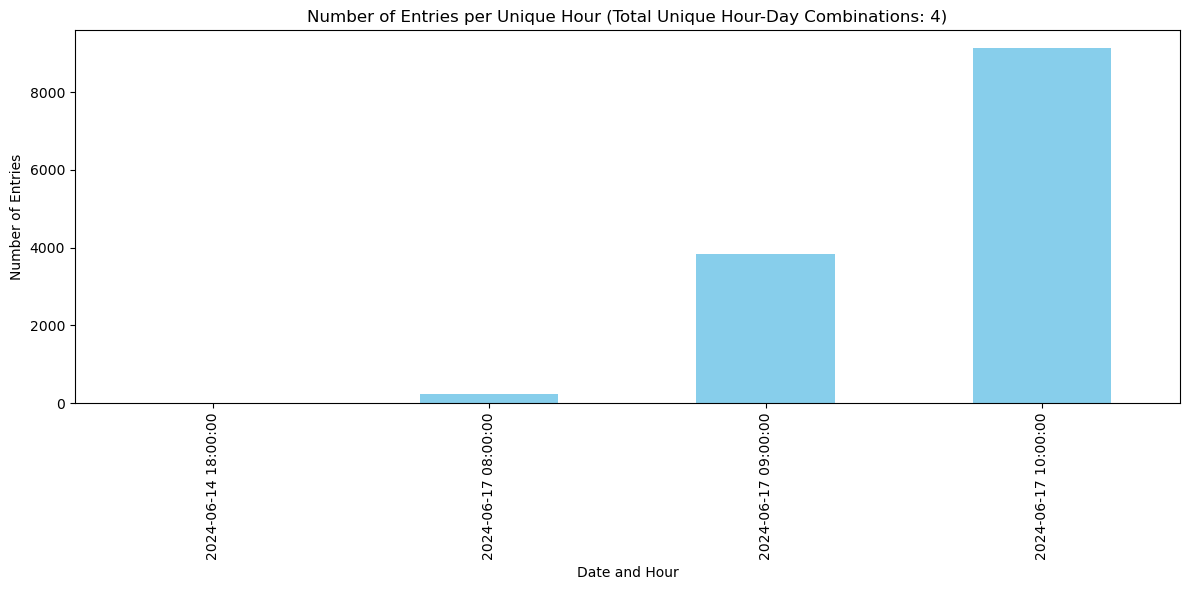

In [17]:
# Extract date and hour from the Time column
df['DateHour'] = df['Time'].dt.strftime('%Y-%m-%d %H:00:00')  # Combine date and hour

# Count the number of unique hour-day combinations
unique_date_hours = df['DateHour'].nunique()

# Convert 'DateHour' to datetime for sorting
df['DateHour'] = pd.to_datetime(df['DateHour'])

# Plot unique hour-day combinations
plt.figure(figsize=(12, 6))
df['DateHour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Number of Entries per Unique Hour (Total Unique Hour-Day Combinations: {unique_date_hours})')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
df[df['Time'].dt.date == pd.to_datetime('2024-06-14').date()]

,Time,Stage3_OutputPower,Stage3_Piezo,Stage4_OutputPower,Stage4_Piezo,Stage3_Stepper,Stage4_Stepper,DateHour
5,2024-06-14 18:46:29.766817093,0.017161,0.0,0.083602,0.0,-176387.0,-289957.0,2024-06-14 18:00:00


In [19]:
# Load the second dataframe from CSV
processed_stg3 = pd.read_csv('processed_stg3spec.csv')

# Convert the 'Time' column in processed_stg3 to datetime format
processed_stg3['Time'] = pd.to_datetime(processed_stg3['Time'])

# Round both 'Time' columns in df and processed_stg3 to the nearest second
df['Time_rounded'] = df['Time'].dt.round('S')
processed_stg3['Time_rounded'] = processed_stg3['Time'].dt.round('S')

# Compare the time values
# 1. Finding common times between both dataframes
common_times = pd.merge(df, processed_stg3, on='Time_rounded', how='inner')

# 2. Finding times present in df but not in processed_stg3
unique_to_df = df[~df['Time_rounded'].isin(processed_stg3['Time_rounded'])]

# 3. Finding times present in processed_stg3 but not in df
unique_to_processed_stg3 = processed_stg3[~processed_stg3['Time_rounded'].isin(df['Time_rounded'])]

# Display the results
print("Common Times:")
print(common_times)

print("\nTimes unique to the first dataframe (df):")
print(unique_to_df)

print("\nTimes unique to the second dataframe (processed_stg3):")
print(unique_to_processed_stg3)


Common Times:
                             Time_x  Stage3_OutputPower  Stage3_Piezo  \
0     2024-06-17 08:58:45.360144138            0.017161      0.000000   
1     2024-06-17 08:58:45.609766960            0.072318      0.000000   
2     2024-06-17 08:58:46.115516186            0.072318      0.000000   
3     2024-06-17 08:58:46.396927834            0.072318      0.000000   
4     2024-06-17 08:58:46.613821030            0.132748      0.000000   
...                             ...                 ...           ...   
12603 2024-06-17 10:27:56.180233955            1.789614     -0.204742   
12604 2024-06-17 10:27:56.182101727            1.789614     -0.204742   
12605 2024-06-17 10:27:56.556657791            1.789614     -0.204742   
12606 2024-06-17 10:27:56.557137966            1.695206     -0.204742   
12607 2024-06-17 10:27:56.776968002            1.695206     -0.192200   

       Stage4_OutputPower  Stage4_Piezo  Stage3_Stepper  Stage4_Stepper  \
0                0.153892      0.0

In [20]:
processed_stg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291904 entries, 0 to 291903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Time          291904 non-null  datetime64[ns]
 1   Intensities   291904 non-null  object        
 2   Wavelengths   291904 non-null  object        
 3   Time_rounded  291904 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 8.9+ MB


In [21]:
# Print the lengths of the results (number of matching and non-matching times)
print(f"Number of common times: {len(common_times)}")
print(f"Number of times unique to the first dataframe (df): {len(unique_to_df)}")
print(f"Number of times unique to the second dataframe (processed_stg3): {len(unique_to_processed_stg3)}")

Number of common times: 12608
Number of times unique to the first dataframe (df): 1156
Number of times unique to the second dataframe (processed_stg3): 289346


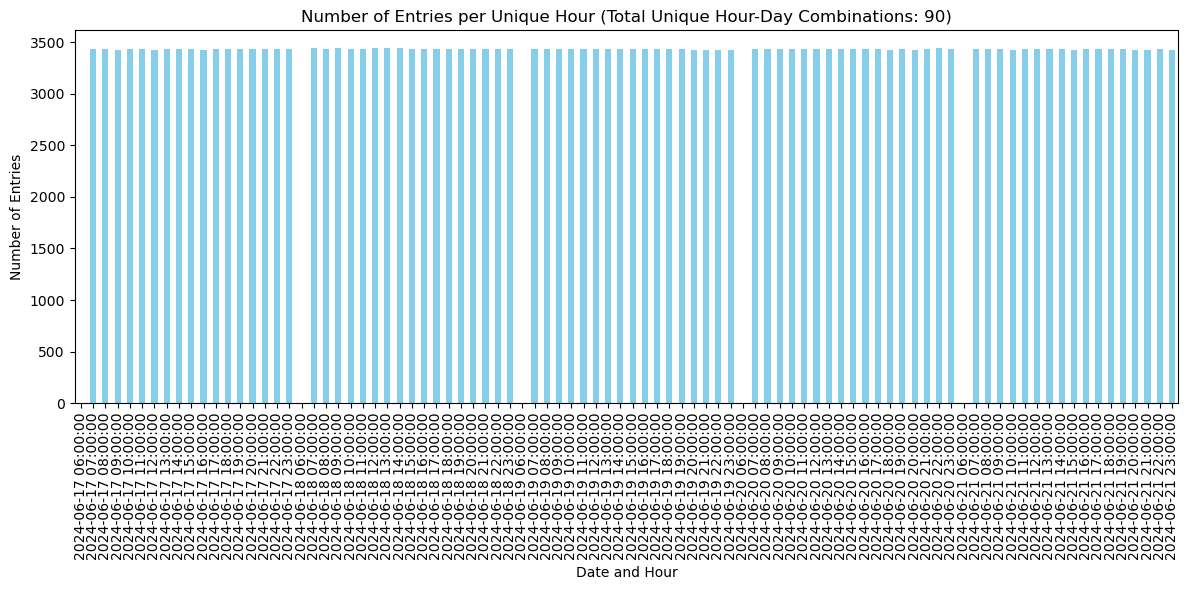

In [22]:
# Extract date and hour from the Time column
processed_stg3['DateHour'] = processed_stg3['Time'].dt.strftime('%Y-%m-%d %H:00:00')  # Combine date and hour

# Count the number of unique hour-day combinations
unique_date_hours_stg3 = processed_stg3['DateHour'].nunique()

# Convert 'DateHour' to datetime for sorting
processed_stg3['DateHour'] = pd.to_datetime(processed_stg3['DateHour'])

# Plot unique hour-day combinations for processed_stg3
plt.figure(figsize=(12, 6))
processed_stg3['DateHour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Number of Entries per Unique Hour (Total Unique Hour-Day Combinations: {unique_date_hours_stg3})')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 5 to 13204
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Time                13200 non-null  datetime64[ns]
 1   Stage3_OutputPower  13200 non-null  float64       
 2   Stage3_Piezo        13200 non-null  float64       
 3   Stage4_OutputPower  13200 non-null  float64       
 4   Stage4_Piezo        13200 non-null  float64       
 5   Stage3_Stepper      13200 non-null  float64       
 6   Stage4_Stepper      13200 non-null  float64       
 7   DateHour            13200 non-null  datetime64[ns]
 8   Time_rounded        13200 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(6)
memory usage: 1.0 MB


In [24]:
processed_stg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291904 entries, 0 to 291903
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Time          291904 non-null  datetime64[ns]
 1   Intensities   291904 non-null  object        
 2   Wavelengths   291904 non-null  object        
 3   Time_rounded  291904 non-null  datetime64[ns]
 4   DateHour      291904 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 11.1+ MB


### Spectograms

In [25]:
# Sort both dataframes by the Time column
df = df.sort_values(by='Time').reset_index(drop=True)
processed_stg3 = processed_stg3.sort_values(by='Time').reset_index(drop=True)

In [29]:
def find_closest_time_and_next_rows(target_time, df1, rows=20):
    # Convert target_time to a pandas Timestamp
    target_time = pd.to_datetime(target_time)

    # Function to find closest time in a DataFrame
    def get_closest_info(df):
        # Calculate the absolute difference between target_time and the time column
        time_diff = (df['Time'] - target_time).abs()
        # Get the index of the closest time
        closest_index = time_diff.idxmin()
        return closest_index

    # Find closest indices
    closest_index_df1 = get_closest_info(df1)

    # Fetch the closest rows and the next 20 rows
    closest_row_df1 = df1.loc[closest_index_df1:closest_index_df1 + rows]

    # Print the results
    print("Closest Time in df1:")
    print(closest_row_df1)


In [30]:
# Call the function
find_closest_time_and_next_rows('2024-06-17 08:58:45.360144138', 
                                df)


Closest Time in df1:
                            Time  Stage3_OutputPower  Stage3_Piezo  \
1  2024-06-17 08:58:45.360144138            0.017161           0.0   
2  2024-06-17 08:58:45.609766960            0.072318           0.0   
3  2024-06-17 08:58:46.115516186            0.072318           0.0   
4  2024-06-17 08:58:46.396927834            0.072318           0.0   
5  2024-06-17 08:58:46.613821030            0.132748           0.0   
6  2024-06-17 08:58:46.861629963            0.050238           0.0   
7  2024-06-17 08:58:47.123392105            0.110111           0.0   
8  2024-06-17 08:58:47.126696110            0.110111           0.0   
9  2024-06-17 08:58:47.402854919            0.110111           0.0   
10 2024-06-17 08:58:47.616254807            0.197615           0.0   
11 2024-06-17 08:58:47.617479801            0.197615           0.0   
12 2024-06-17 08:58:47.868903160            0.070367           0.0   
13 2024-06-17 08:58:50.627602100            0.123573           0.0   

In [31]:
# Call the function
find_closest_time_and_next_rows('2024-06-17 08:58:45.360144138', 
                                processed_stg3)

Closest Time in df1:
                              Time  \
6794 2024-06-17 08:58:45.126377583   
6795 2024-06-17 08:58:45.976838589   
6796 2024-06-17 08:58:46.883821487   
6797 2024-06-17 08:58:47.940751076   
6798 2024-06-17 08:58:49.300298214   
6799 2024-06-17 08:58:50.155582428   
6800 2024-06-17 08:58:51.115458965   
6801 2024-06-17 08:58:52.219950199   
6802 2024-06-17 08:58:53.425679207   
6803 2024-06-17 08:58:54.434805393   
6804 2024-06-17 08:58:55.342828751   
6805 2024-06-17 08:58:56.398769379   
6806 2024-06-17 08:58:57.708949566   
6807 2024-06-17 08:58:58.716591835   
6808 2024-06-17 08:58:59.573713779   
6809 2024-06-17 08:59:00.630595207   
6810 2024-06-17 08:59:01.941629410   
6811 2024-06-17 08:59:02.799632072   
6812 2024-06-17 08:59:03.752634525   
6813 2024-06-17 08:59:04.812631130   
6814 2024-06-17 08:59:06.117633820   

                                            Intensities  \
6794  [2.416987, -1.878997, -3.094142, 10.856287, 2....   
6795  [2.416987, -3.8789